# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression</a></span></li><li><span><a href="#How-good-is-our-model?" data-toc-modified-id="How-good-is-our-model?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How good is our model?</a></span></li><li><span><a href="#Calculate-the-R2-of-the-model" data-toc-modified-id="Calculate-the-R2-of-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate the R2 of the model</a></span></li><li><span><a href="#Linear-regression-with-sklearn" data-toc-modified-id="Linear-regression-with-sklearn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear regression with sklearn</a></span></li><li><span><a href="#Linear-regression-with-statsmodels" data-toc-modified-id="Linear-regression-with-statsmodels-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Linear regression with statsmodels</a></span></li><li><span><a href="#OLS-Concepts" data-toc-modified-id="OLS-Concepts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>OLS Concepts</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Linear-model-extensions" data-toc-modified-id="Linear-model-extensions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Linear model extensions</a></span><ul class="toc-item"><li><span><a href="#Challenging-the-additive-assumption:-synergy" data-toc-modified-id="Challenging-the-additive-assumption:-synergy-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Challenging the additive assumption: synergy</a></span></li></ul></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Let's do it</a></span><ul class="toc-item"><li><span><a href="#$R^2$-Adjusted" data-toc-modified-id="$R^2$-Adjusted-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>$R^2$ Adjusted</a></span></li></ul></li><li><span><a href="#Potential-problems-in-linear-regression" data-toc-modified-id="Potential-problems-in-linear-regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Potential problems in linear regression</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-Materials" data-toc-modified-id="Further-Materials-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Further Materials</a></span></li></ul></div>

In [1]:
#!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [4]:
"""
tendencia
distribución de los datos
cambio de los datos en el tiempo -> serie temporal
    - autocorrelación (lag)
"""

"""Regresión lineal: modelo que sigue una línea recta
MODELO
- Estereotipo
    - Resumir
    - Predecir (tener expectativas)
    - Error
"""

'Regresión lineal: modelo que sigue una línea recta\nMODELO\n- Estereotipo\n    - Resumir\n    - Predecir (tener expectativas)\n    - Error\n'

## Motivation

We have 100 students, and we know:
 * How many hours they studied for their exam
 * The grade they have obtained (from 0 to 100)

In [5]:
df = pd.read_csv("datasets/hours_vs_mark.csv")

In [7]:
df.drop(columns="Unnamed: 0", inplace=True)

In [8]:
df

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


### Exploratory Analysis

In [11]:
df.sample()

,hours,mark
79,698,83


In [ ]:
# 100, 2 cols

In [12]:
df.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


In [ ]:
# 1 variable
    # histograma
    # boxplot
# 2 variables
    # boxplot conjunto
    # sccatterplot

In [18]:
from scipy.stats import skew
skew(df.hours)

0.27076843025356906

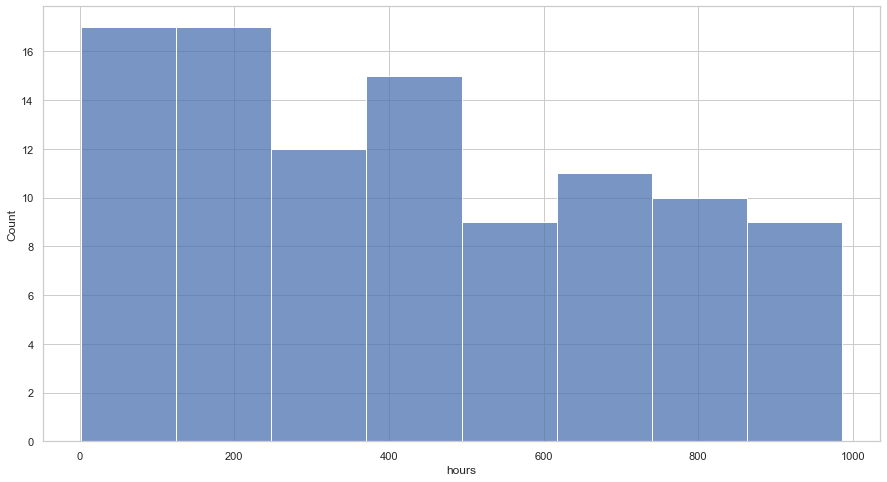

In [17]:
sns.histplot(x=df.hours);

In [20]:
from scipy.stats import skew
skew(df.mark)

0.2373012530771386

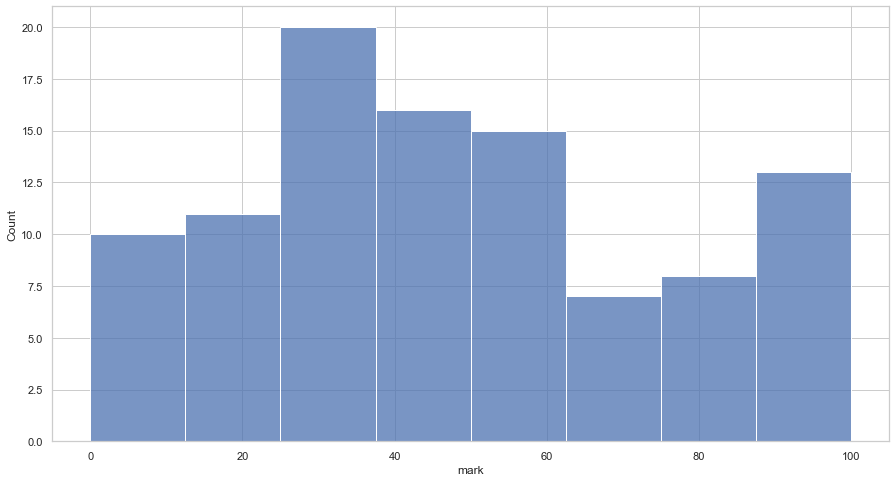

In [19]:
sns.histplot(x=df.mark);

'positiva pero baja -> hay mucha dispersión'

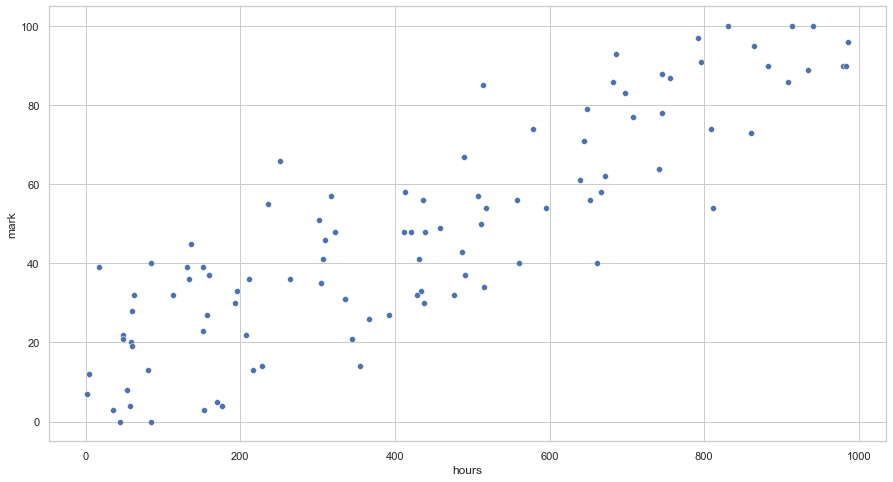

In [21]:
sns.scatterplot(x = df.hours, y=df.mark);
"Correlación positiva -> cuando aumenta una, aumenta la otra" 
"positiva pero baja -> hay mucha dispersión"

# y = mx + n 
# nota = m * horas + n
# nota = coeficiente1 * horas + elpuntodecorte(coeficiente0)

We would like to understand the relationship $$grade = f(hours)$$

To be able to **predict the expected grade** that we will obtain when studying a certain number of hours

In [ ]:
# y = mx + n 
# nota = m * horas + n
# nota = coeficiente1 * horas + elpuntodecorte(coeficiente0)

In [27]:
def notas_segun_horas (x):
    m = 0.8
    n = 4
    
    y = m * x + n    #estereotipo
    return y

In [28]:
y = notas_segun_horas (80)
y

68.0

Let's try a $$Y = m * X + n$$ linear regression
$m$ is the slope
$n$ is the value of $Y$ when $X=0$
And we have to:
$$grade = m * hours + n$$
We want to find $m$ and $n$ that *best* model our data


In [29]:
def notas_segun_horas (x):
    m = 0.8
    n = 4
    
    y = m * x + n    #estereotipo
    return y

In [30]:
df["prediction_1"] = 0.1 * df.hours + 5
df["prediction_2"] = 0.12 * df.hours + 10

In [31]:
df

,hours,mark,prediction_1,prediction_2
0,865,95,91.5,113.80
1,4,12,5.4,10.48
2,305,35,35.5,46.60
3,437,56,48.7,62.44
4,682,86,73.2,91.84
...,...,...,...,...
95,252,66,30.2,40.24
96,49,21,9.9,15.88
97,792,97,84.2,105.04
98,310,46,36.0,47.20


In [ ]:
# La media de la diferencia

In [33]:
df["error_1"] = (df.prediction_1 - df.mark).abs()
df["error_2"] = (df.prediction_2 - df.mark).abs()

In [34]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,91.5,113.80,3.5,18.80
1,4,12,5.4,10.48,6.6,1.52
2,305,35,35.5,46.60,0.5,11.60
3,437,56,48.7,62.44,7.3,6.44
4,682,86,73.2,91.84,12.8,5.84
...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76
96,49,21,9.9,15.88,11.1,5.12
97,792,97,84.2,105.04,12.8,8.04
98,310,46,36.0,47.20,10.0,1.20


In [36]:
df.error_1.mean() # Mean Absolute Error -> 12 puntos

12.008

In [37]:
df.error_2.mean() # Mean Absolute Error -> 18.07 puntos

18.073599999999995

In [ ]:
# Mean Absolute Error -> MAE 

In [ ]:
# 1. Creado dos modelos predictivos
# 2. Evaluado la "performance" (desempeño) de los modelos -> mirando el error

Which has worked better? How can we measure the error of the models?

We can subtract our prediction from the grade to see what we have done wrong in each one and make the average.... we use the absolute value to remove the negative values ​​and then we talk about this error, which has a name and it is MAE (mean absolutely error)

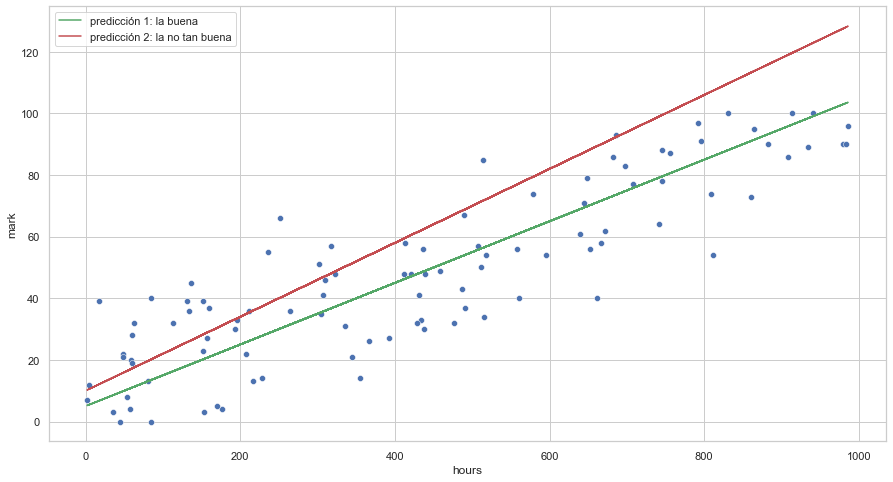

In [40]:
sns.scatterplot(x=df.hours, y=df.mark)
plt.plot(df.hours, df.prediction_1, label="predicción 1: la buena", c="g")
plt.plot(df.hours, df.prediction_2, label="predicción 2: la no tan buena", c="r")
plt.legend();

What is going to be our goal? Python and its libraries do this for us, it calculates the slope and the intercept to be able to make "predictions" of unknown data from data that we already have.

## Simple linear regression

Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable. Mathematically, it can be expressed as:

![formula](images/formula.png)

If we dig a little deeper, we can find this other expression:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
* $X$ = predictor variable
* $Y$ = target variable
* $\beta_0$ = intercept
* $\beta_1$ = slope / slope
* $\epsilon$ = noise (gaussian)


The above equation is known as the *population regression line*.
The simple linear regression line usually has the form shown in the formula above, where β0 and β1 are unknown constants, representing the intercept and slope of the regression line, respectively.

The intercept is the value of the dependent variable (Y) when the independent variable (X) has a value of zero (0). The slope is a measure of the rate at which the dependent variable (Y) changes when the independent variable (X) changes by one (1). The unknown constants are called the coefficients or parameters of the model. This form of the regression line is sometimes known as a population regression line and, as a probabilistic model, it roughly fits the data set hence the use of the symbol (≈) in the image. The model is called probabilistic because it does not model all the variability of the dependent variable (Y)

In [41]:
lr = LinearRegression()

In [ ]:
# y = mx + n
# y = notas_segun_horas(x)

In [43]:
lr.fit(
    X = df[["hours"]], # X predictoras -> 
    y = df.mark   # target -> a predecir -> 
) 

# ajustar / entrenar

LinearRegression()

In [44]:
[i for i in dir(lr)]

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
# y = mx + lx + qwx + n
# precio = m2*b1 + habitaciones*b2 + barrio*beta3 + beta0

In [45]:
lr.intercept_ # intersección

11.78070717807148

In [49]:
lr.coef_[0] # coeficientes

0.08437787096170372

In [51]:
def prediction_through_sickitlearn (x):
    m =  lr.coef_[0]
    n = lr.intercept_
     
    return m * x + n 

In [52]:
df["prediction_through_sickitlearn"] = df.hours.apply(prediction_through_sickitlearn)

In [54]:
df["error_prediction_through_sickitlearn"] = (df["prediction_through_sickitlearn"] - df.mark).abs()

In [55]:
df

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_sickitlearn,error_prediction_through_sickitlearn
0,865,95,91.5,113.80,3.5,18.80,84.767566,10.232434
1,4,12,5.4,10.48,6.6,1.52,12.118219,0.118219
2,305,35,35.5,46.60,0.5,11.60,37.515958,2.515958
3,437,56,48.7,62.44,7.3,6.44,48.653837,7.346163
4,682,86,73.2,91.84,12.8,5.84,69.326415,16.673585
...,...,...,...,...,...,...,...,...
95,252,66,30.2,40.24,35.8,25.76,33.043931,32.956069
96,49,21,9.9,15.88,11.1,5.12,15.915223,5.084777
97,792,97,84.2,105.04,12.8,8.04,78.607981,18.392019
98,310,46,36.0,47.20,10.0,1.20,37.937847,8.062153


In [58]:
mae = df.error_prediction_through_sickitlearn.mean()

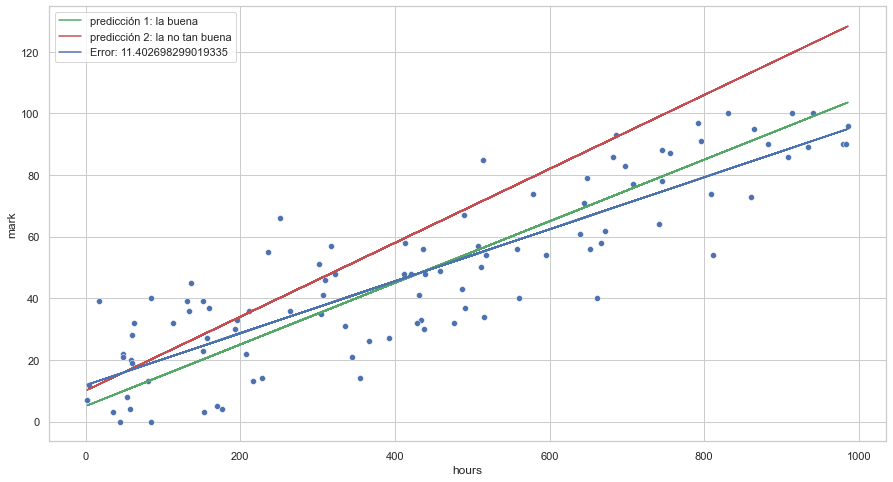

In [59]:
sns.scatterplot(x=df.hours, y=df.mark)
plt.plot(df.hours, df.prediction_1, label="predicción 1: la buena", c="g")
plt.plot(df.hours, df.prediction_2, label="predicción 2: la no tan buena", c="r")
plt.plot(df.hours, df.prediction_through_sickitlearn, label=f"Error: {mae}", c="b")
plt.legend();

In [ ]:
# MAE: Mean absolute error
# MSE: Mean squared error
# RMSE: Root mean squared error

# r2: 0-1
    # cómo se calcula
    




# Peso de las features


## How good is our model?

In [61]:
X = df[["hours"]]
y = df.mark

In [63]:
df.sample()

,hours,mark,prediction_1,prediction_2,error_1,error_2,prediction_through_sickitlearn,error_prediction_through_sickitlearn
96,49,21,9.9,15.88,11.1,5.12,15.915223,5.084777


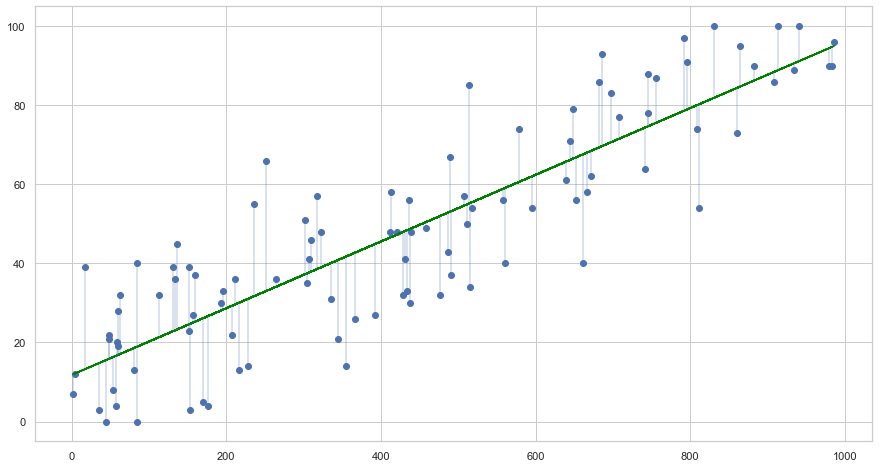

In [69]:
plt.scatter(X, y)
plt.plot(df.hours, df.prediction_through_sickitlearn, c="green")
plt.vlines(X, df.prediction_through_sickitlearn, y, lw=0.4); # RSS

In [70]:
df["avg"] = df.mark.mean()

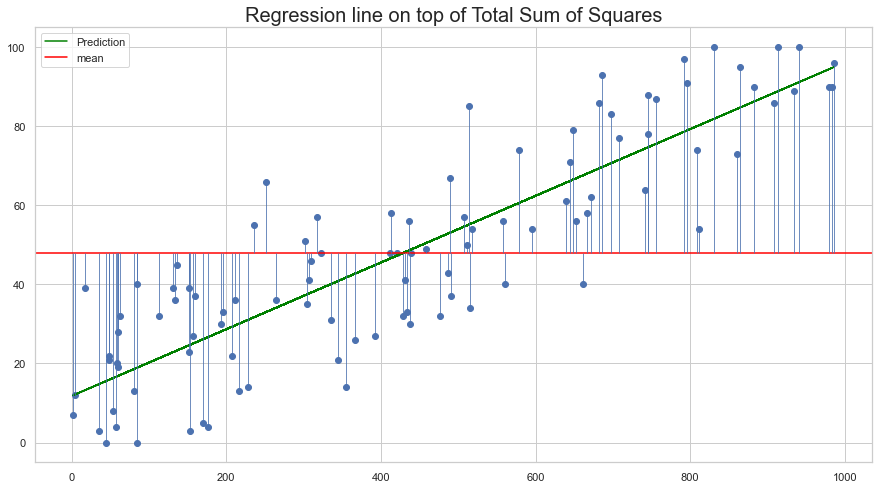

In [78]:
plt.scatter(X, y)
plt.plot(df.hours, df["prediction_through_sickitlearn"], c="green", label="Prediction")
plt.axhline(df["mark"].mean(), c="red", label="mean")
plt.vlines(X, df["avg"], y, lw=0.8)
plt.title("Regression line on top of Total Sum of Squares", size=20)
plt.legend();

The numerical difference between the *least squares regression line* and the actual value is called the *residual* , and it represents the error in the estimate: $e = y_i - \hat{y}$.
The regression line minimized the **Residual Sum of Squares** (RSS)

The residual sum of squares measures the amount of error remaining between the regression function and the data set. a smaller residual sum of squares represents a regression function. The residual sum of squares, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

If we only used the mean as the predicted value for each prediction, the error we would make is (**total sum of squares**)

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$
Let's consider this our starting point, make a prediction and plot it

Recall that linear regression coefficients minimize the $RSS=Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that remains unexplained after running the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained by X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is nothing more than the square of the *Pearson* correlation coefficient that we already know.

## Calculate the R2 of the model

$R^2$ measures how good our regression model is. The bigger the better. It is a value between 0 and 1

**NOTE**: it is computable for any model, it does not matter if it is linear or not. Only the actual and predicted values ​​are needed.

## Linear regression with sklearn

# 1. Select the data: `my_variables = X, y` # independant X, dependant y. target variable -> y (grades)
# 2. Fit the model to the data: `my_model = lr.fit(X, y)`
# 3. Predict with the model fitted: `predicted_y = lr.predict(X)`

In [81]:
from sklearn import metrics

**Calculation of the absolute mean error, the mean square error and the mean square error

- **MAE** is the easiest to understand, because it is the mean error.
- **The MSE** is more popular than the MAE, because the MSE accounts for larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**: we want to minimize them.

In [84]:
mae = metrics.mean_absolute_error(df.mark, df.prediction_through_sickitlearn)
mse = metrics.mean_squared_error(df.mark, df.prediction_through_sickitlearn)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(df.mark, df.prediction_through_sickitlearn)

In [ ]:
# ridge
# lasso

In [85]:
print(f"MAE is: {mae}")
print(f"MSE is: {mse}")
print(f"RMSE is: {rmse}")
print(f"r2 is: {r2}")

MAE is: 11.402698299019335
MSE is: 189.31609105092303
RMSE is: 13.759218402617318
r2 is: 0.7518130774464549


Read more about MAE, MSE, RMSE AND R2 [here](http://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

## Linear regression with statsmodels

A bit of [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

And [this article](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) that summarizes how to interpret OLS summary information

## OLS Concepts

- <b>R2</b> : The coefficient of determination measures how much of the variation of 𝑦 is explained by the model.
If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is equal to zero.


- <b>𝑅¯2 </b> : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analyzed case) and the amount of data 𝑁

- <b>P value </b> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (has no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values ​​are used to determine which terms should be kept in the regression model.


Description of the p value:
The p-value is a probability value, so it ranges between 0 and 1. The p-value shows us the probability of having obtained the result that we have obtained assuming that the null hypothesis H0 is true. It is often said that high values ​​of p do not allow H0 to be rejected, while low p values ​​do allow H0 to be rejected.

In a statistical test, the null hypothesis H0 is rejected if the p-value associated with the observed result is equal to or less than an arbitrarily set $\alpha$ significance level, conventionally 0.05 or 0.01. In other words, if the result obtained is more unusual than the expected range of results given a true null hypothesis H0 and the chosen significance level $\alpha$, that is, if p is less than $\alpha$, we can say that we have a statistically significant result that allows reject H0.

It is important to emphasize that a hypothesis test does not allow accepting a hypothesis; he simply rejects it or does not reject it, that is to say, he dismisses it as plausible (which does not necessarily mean that it is true, simply that it is more likely to be) or implausible.

In [87]:
result = smf.ols("mark ~ hours", data=df).fit()
result

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           2.04e-31
Time:                        13:40:41   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

Of course, the hours one studies are not the only important factor in getting good grades in the real world. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$
 
 In this case, what we are going to do is add a variable that subtracts from the note, the party hours.
 Imagine that for every hour that we go out partying, neurons in our brain die and we forget information, therefore, we will lose a grade (remember that we are inventing data)

In [155]:
num_grades = 100

In [156]:
study_hours = np.random.normal(500, 200, num_grades)
party_hours = np.random.normal(500, 200, num_grades)

In [157]:
beta_0 = 10 # intercept
beta_1 = 0.08 # study_hours
beta_2 = -0.03 # party_hours

In [158]:
ecuacion = beta_0 + study_hours * beta_1 + party_hours * beta_2 + np.random.normal(0, 5, 100)

In [159]:
data = pd.DataFrame({"grades": ecuacion, "study_hours": study_hours, "party_hours": party_hours})

In [160]:
data

,grades,study_hours,party_hours
0,11.049201,219.620481,797.306347
1,37.154300,430.230767,305.645352
2,44.603203,666.245985,448.013499
3,38.439978,473.825057,272.262781
4,24.656178,172.888888,166.000861
...,...,...,...
95,31.457140,445.462969,459.204844
96,29.186656,463.872301,475.757043
97,49.526001,527.997812,34.554559
98,63.276656,556.618810,90.985227


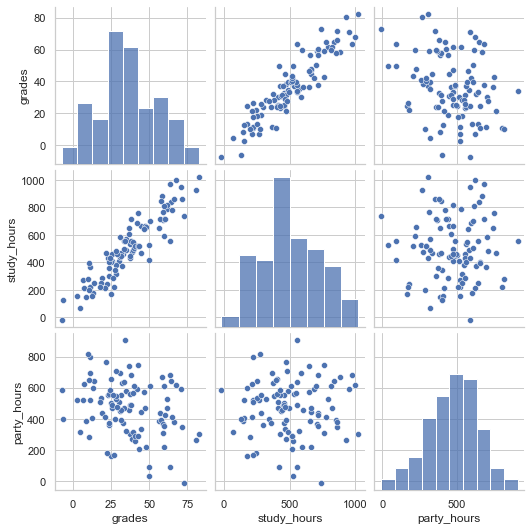

In [161]:
sns.pairplot(data);

In [162]:
results = smf.ols("grades ~ study_hours + party_hours", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     634.7
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.92e-56
Time:                        14:24:36   Log-Likelihood:                -306.59
No. Observations:                 100   AIC:                             619.2
Df Residuals:                      97   BIC:                             627.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.3153      1.889      5.989      0.000       7.566      15.065
study_hours     0.0790      0.002     34.165      0.000       0.074       0.084
party_hours    -0.0316      0.003    -10.538      0.000      -0.038      -0.026
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.550
Skew:                          -0.167   Prob(JB):                        0.760
Kurtosis:                       2.859   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The multiple linear regression coefficients are computed in a similar way to the simple linear regression case: they minimize

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{beta_0} + \hat{beta_1 X_1} + \hat{beta_2} X_2 + \hat + \hat{\beta_2} X_m$$

The coefficient is the number by which we multiply the predictor variable (X) in this case we have two, study hours and party hours.
The positive coefficient indicates that the correlation is positive (the more hours I study, the better the grade I get) and the coefficient of party hours is negative, therefore it indicates that if that predictive variable is greater, my target variable decreases.

## Categorical variables

Very often we are faced with situations where the predictors are *qualitative* in nature. A good example could be the music they listen to which can take the values ​​$rock$ or $indie$.

In [221]:
data["music"] = np.random.choice(["jazz", "indie"], num_grades)

In [222]:
data[["jazz", "rock"]] = data.music.str.get_dummies("music")

In [223]:
data

,grades,study_hours,party_hours,music,indie,rock,jazz
0,11.049201,219.620481,797.306347,jazz,1,1,0
1,37.154300,430.230767,305.645352,indie,0,0,1
2,44.603203,666.245985,448.013499,jazz,1,1,0
3,38.439978,473.825057,272.262781,indie,1,0,1
4,24.656178,172.888888,166.000861,indie,1,0,1
...,...,...,...,...,...,...,...
95,31.457140,445.462969,459.204844,indie,1,0,1
96,29.186656,463.872301,475.757043,jazz,0,1,0
97,49.526001,527.997812,34.554559,indie,1,0,1
98,63.276656,556.618810,90.985227,indie,1,0,1


In [225]:
data["music"] = data["music"].apply(lambda x: 1 if x == "jazz" else 2)

In [226]:
data.sample()

,grades,study_hours,party_hours,music,indie,rock,jazz
44,13.495492,179.411552,598.994264,2,0,1,0


In [227]:
results = smf.ols("grades ~ study_hours + party_hours + music + jazz + indie" ,data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           2.74e-54
Time:                        14:31:11   Log-Likelihood:                -305.02
No. Observations:                 100   AIC:                             620.0
Df Residuals:                      95   BIC:                             633.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8806      0.445      4.228      0.000       0.998       2.764
study_hours     0.0791      0.002     34.372      0.000       0.075       0.084
party_hours    -0.0303      0.003     -9.802      0.000      -0.036      -0.024
music           3.7613      0.890      4.228      0.000       1.995       5.528
jazz            1.7961      1.076      1.670      0.098      -0.339       3.931
indie           0.6963      1.065      0.653      0.515      -1.419       2.812
==============================================================================
Omnibus:                        1.646   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.280
Skew:                          -0.273   Prob(JB):                        0.527
Kurtosis:                       3.099   Cond. No.                     2.81e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [228]:
data

,grades,study_hours,party_hours,music,indie,rock,jazz
0,11.049201,219.620481,797.306347,2,1,1,0
1,37.154300,430.230767,305.645352,2,0,0,1
2,44.603203,666.245985,448.013499,2,1,1,0
3,38.439978,473.825057,272.262781,2,1,0,1
4,24.656178,172.888888,166.000861,2,1,0,1
...,...,...,...,...,...,...,...
95,31.457140,445.462969,459.204844,2,1,0,1
96,29.186656,463.872301,475.757043,2,0,1,0
97,49.526001,527.997812,34.554559,2,1,0,1
98,63.276656,556.618810,90.985227,2,1,0,1


We include this information in the model through a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if listens to rock} \\
      0  \quad \text{if listens to indie} \\
\end{array} 
\right. 
$$


If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if listens to rock} \\
      \beta_0 + \epsilon_i  \quad \text{if listens to indie} \\
\end{array} 
\right.  $$

In this case, $\beta_0$ represents the average score of people who listen to rock, and $\beta_0 + \beta_1$ the average score of people who listen to indie.

## Linear model extensions

There are several assumptions used when fitting a linear model.
Linear model assumptions 
[VIDEO](https://www.youtube.com/watch?v=hVe2F9krrWk)

* Errors are normally distributed and have constant variance: luxury items
* Errors are not correlated with each other

***Additive Assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values ​​of the other predictors.

***Linear Assumption**The change in the answer for a unit increase in $X_j$ is the same regardless of the value of $X_j$.

### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we may think that the more our ads are heard on the radio, the more effective our TV ads will be. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

This is a commonly studied topic in [marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

## Let's do it
* Create three independent simple linear regression models
* Interpret the results
* Create a multivariate model with the three predictors
* Interpret the results

In [122]:
df = pd.read_csv("datasets/Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [129]:
results = smf.ols("Sales ~ TV + Radio + Newspaper", data= df).fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        14:09:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

Remember the **hierarchical principle:**

"*If we include an interaction in a model, we must also include the main effects, even if the p-values ​​associated with its coefficients are not significant*"

### $R^2$ Adjusted
There is a curious thing with $R^2$. Look what happens when we include *random* variables!

"It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared."

In [125]:
df_adv = pd.read_csv("datasets/Advertising.csv")

In [126]:
df_adv["rand_1"] = np.random.normal(size=200)
df_adv["rand_2"] = np.random.normal(size=200)
df_adv["rand_3"] = np.random.normal(size=200)
df_adv["rand_4"] = np.random.normal(size=200)
df_adv["rand_5"] = np.random.normal(size=200)
df_adv["rand_6"] = np.random.normal(size=200)
df_adv["rand_7"] = np.random.normal(size=200)
df_adv["rand_8"] = np.random.normal(size=200)

In [127]:
df_adv

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
0,230.1,37.8,69.2,22.1,0.275949,-1.814872,0.628906,0.012188,-0.787033,-0.569352,-0.168894,-0.121871
1,44.5,39.3,45.1,10.4,0.168782,-1.216185,0.196180,-0.392557,0.051619,0.465665,-0.017620,-0.827875
2,17.2,45.9,69.3,9.3,-1.764113,0.344999,1.339159,-1.770671,-0.320321,0.282376,-0.271063,0.342236
3,151.5,41.3,58.5,18.5,-0.565229,0.503848,-1.377558,-0.142446,0.406614,1.095235,-0.956813,1.171972
4,180.8,10.8,58.4,12.9,-0.362323,1.018984,-2.178369,0.939048,0.475706,1.932579,-0.582323,1.258310
...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-1.439676,-0.221000,-0.884686,-1.853149,0.339758,-0.832210,-0.854192,-0.179562
196,94.2,4.9,8.1,9.7,-0.221524,0.020646,2.401246,0.395084,-1.376638,-1.172742,-0.045599,-1.677734
197,177.0,9.3,6.4,12.8,0.794894,-0.119032,0.119192,0.376572,0.510341,0.653814,-0.254218,0.763252
198,283.6,42.0,66.2,25.5,0.576675,-1.656590,-0.500453,-0.103325,0.640571,-1.242014,-1.082554,-1.378060


In [131]:
results = smf.ols("Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8" , data= df_adv).fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           9.54e-88
Time:                        14:10:44   Log-Likelihood:                -383.35
No. Observations:                 200   AIC:                             790.7
Df Residuals:                     188   BIC:                             830.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8864      0.322      8.959      0.000       2.251       3.522
TV             0.0459      0.001     31.877      0.000       0.043       0.049
Radio          0.1897      0.009     21.276      0.000       0.172       0.207
Newspaper     -0.0011      0.006     -0.177      0.860      -0.013       0.011
rand_1        -0.0474      0.124     -0.383      0.702      -0.292       0.197
rand_2        -0.0857      0.122     -0.701      0.484      -0.327       0.155
rand_3        -0.0883      0.114     -0.772      0.441      -0.314       0.137
rand_4         0.2170      0.135      1.610      0.109      -0.049       0.483
rand_5        -0.0728      0.132     -0.550      0.583      -0.334       0.188
rand_6        -0.0643      0.134     -0.480      0.631      -0.328       0.200
rand_7        -0.1077      0.121     -0.890      0.375      -0.346       0.131
rand_8        -0.0531      0.118     -0.450      0.653      -0.286       0.180
==============================================================================
Omnibus:                       45.849   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.208
Skew:                          -1.110   Prob(JB):                     4.25e-20
Kurtosis:                       5.403   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Potential problems in linear regression

The main assumptions of a linear model are:

* Data is linear
* Errors are not correlated
* The variance of the error terms is constant

What happens if these assumptions are not met?

In addition, our models can suffer from other problems such as:
* Outliers
* Collinearity
* Missing values

See this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.

These four data sets are different, but they happen to have the same arithmetic mean and variance of the x and y values, the same correlation, the same correlation coefficient, and the same regression line. some with 2 or 3 decimal places. They are the Anscombe Quartet, named for F.J. Anscombe, a statistical mathematician who published them in 1973. They are often used to teach that in addition to calculating the statistical properties of data, it is convenient to visualize them.

In all cases, the representations tell us something more about the data: the first ones seem somewhat random but related, the second ones show a clear but remarkably different pattern; in the third and fourth there are other patterns clouded by some outliers. These values ​​can be errors, real data that is just out of the ordinary, or even artificially produced data to make it all fit together.

Moral: don't blindly trust the data and neither the statistics you get from them; also try to set up a visualization to understand them.
![anscombe](images/anscombe.png)

## Summary

In [ ]:
# chamuyo

## Further Materials 

* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)